This notebook requires that you have previously run the notebook **Analyze by person** to generate raw data summaries and a timing analysis summary. We assume those files are located in ../processed data/ and have the name prefix "SeattleUgrad"... these variables should be changed in future if this code is used for a different project in a different directory   

In [1]:
%run load_actiwatch_data.py
%run firsttime.py

import matplotlib.pyplot as plt
%matplotlib inline

import pyarrow

from joblib import *

import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats

# this is used to make Federal Holidays a nonschool day.  Note that we don't have any
# way to recognize school district unique holidays, like teacher work days of such 
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


fileprefix = '../processed data/SeaUgrad'

In [ ]:
allData = pd.read_parquet(fileprefix+'raw.parquet')

In [2]:
# TimingAnaylsis is the more polished and complete version of TimingData
thetiming = pd.read_parquet(fileprefix+'TimingAnalysis.parquet', engine='fastparquet')

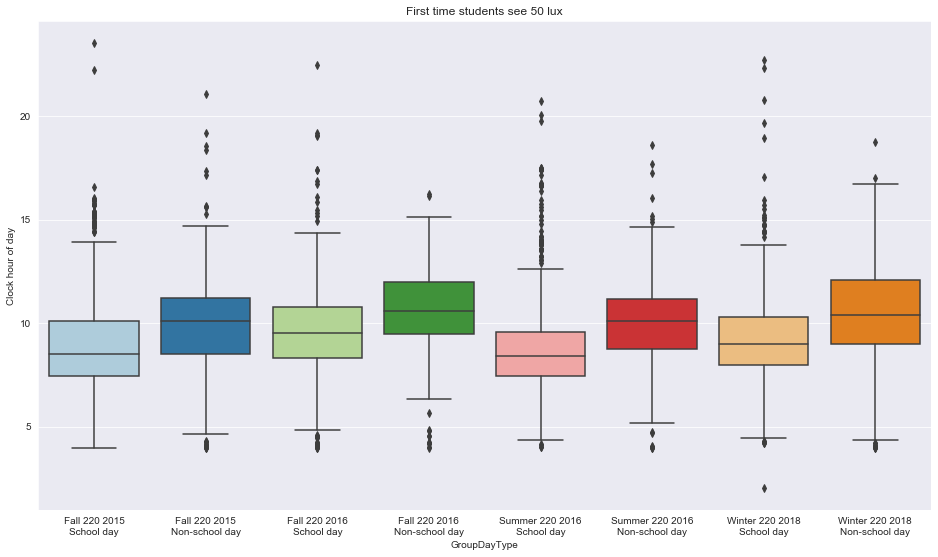

In [3]:
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
sns.boxplot(data=thetiming.query('Threshold == 50'),x='GroupDayType',y='firstlight', order=['Fall 220 2015\nSchool day', 'Fall 220 2015\nNon-school day', 'Fall 220 2016\nSchool day', 'Fall 220 2016\nNon-school day', 'Summer 220 2016\nSchool day', 'Summer 220 2016\nNon-school day', 'Winter 220 2018\nSchool day', 'Winter 220 2018\nNon-school day'], palette=sns.color_palette("Paired"))
plt.title('First time students see 50 lux');
plt.ylabel('Clock hour of day');
plt.savefig('../light figures/first50lux_clock_220.png')
#plt.xticks(rotation=45);

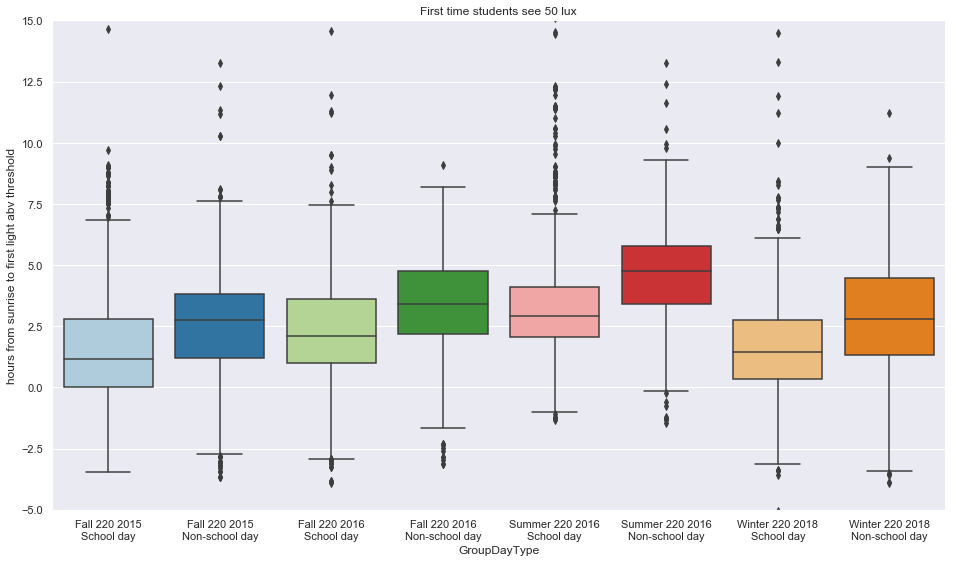

In [426]:
plt.figure(figsize=(16,9))

sns.boxplot(data=thetiming.query('Threshold == 50'),x='GroupDayType',y='hours from sunrise to first light abv threshold', order=['Fall 220 2015\nSchool day', 'Fall 220 2015\nNon-school day', 'Fall 220 2016\nSchool day', 'Fall 220 2016\nNon-school day', 'Summer 220 2016\nSchool day', 'Summer 220 2016\nNon-school day', 'Winter 220 2018\nSchool day', 'Winter 220 2018\nNon-school day'], palette=sns.color_palette("Paired"))
plt.title('First time students see 50 lux');
plt.ylim(bottom=-5,top=15)
plt.savefig('../light figures/first50lux_sincesunset_220.png')
#plt.xticks(rotation=45);

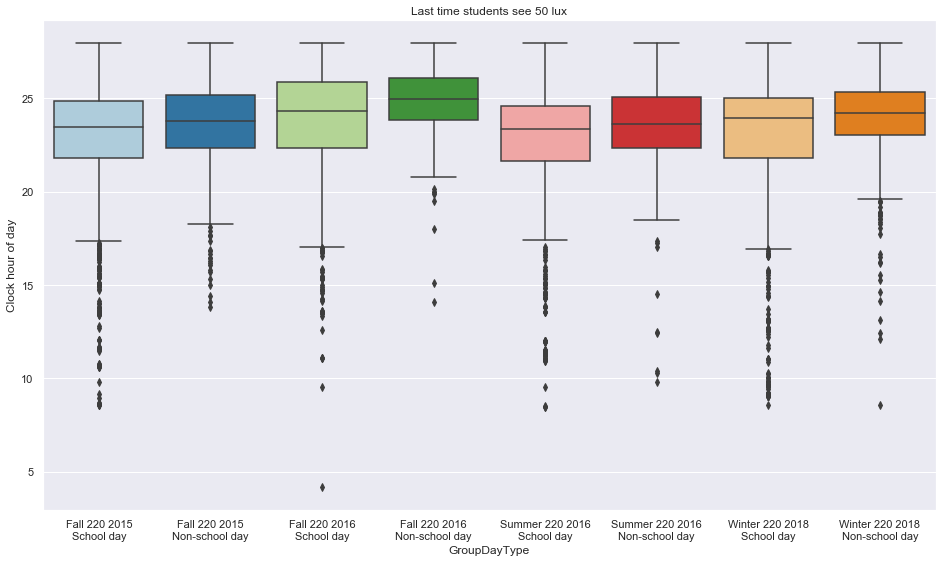

In [427]:
plt.figure(figsize=(16,9))

sns.boxplot(data=thetiming.query('Threshold == 50'),x='GroupDayType',y='lastlight', order=['Fall 220 2015\nSchool day', 'Fall 220 2015\nNon-school day', 'Fall 220 2016\nSchool day', 'Fall 220 2016\nNon-school day', 'Summer 220 2016\nSchool day', 'Summer 220 2016\nNon-school day', 'Winter 220 2018\nSchool day', 'Winter 220 2018\nNon-school day'], palette=sns.color_palette("Paired"))
plt.title('Last time students see 50 lux');
plt.ylabel('Clock hour of day');
plt.savefig('../light figures/last50lux_clock_220.png')
#plt.xticks(rotation=45);

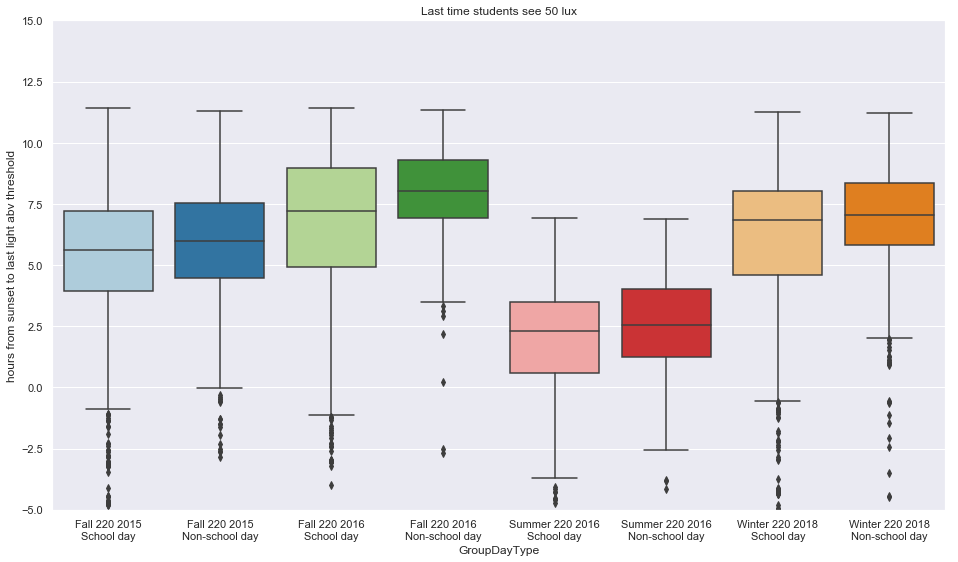

In [428]:
plt.figure(figsize=(16,9))

sns.boxplot(data=thetiming.query('Threshold == 50'),x='GroupDayType',y='hours from sunset to last light abv threshold', order=['Fall 220 2015\nSchool day', 'Fall 220 2015\nNon-school day', 'Fall 220 2016\nSchool day', 'Fall 220 2016\nNon-school day', 'Summer 220 2016\nSchool day', 'Summer 220 2016\nNon-school day', 'Winter 220 2018\nSchool day', 'Winter 220 2018\nNon-school day'], palette=sns.color_palette("Paired"))
plt.title('Last time students see 50 lux');
plt.ylim(bottom=-5,top=15.)

#plt.xticks(rotation=45);
plt.savefig('../light figures/lastst50lux_sincesunset_220.png')

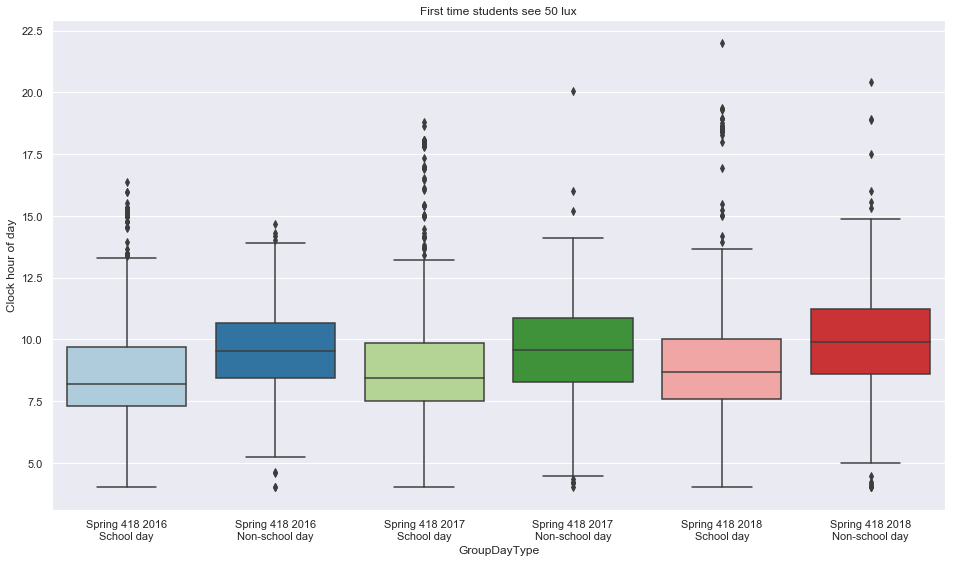

In [429]:
plt.figure(figsize=(16,9))

sns.boxplot(data=thetiming.query('Threshold == 50'),x='GroupDayType',y='firstlight', order=['Spring 418 2016\nSchool day', 'Spring 418 2016\nNon-school day', 'Spring 418 2017\nSchool day', 'Spring 418 2017\nNon-school day', 'Spring 418 2018\nSchool day', 'Spring 418 2018\nNon-school day'], palette=sns.color_palette("Paired"))
plt.title('First time students see 50 lux');
plt.ylabel('Clock hour of day');
plt.savefig('../light figures/first50lux_clock_418.png')
#plt.xticks(rotation=45);

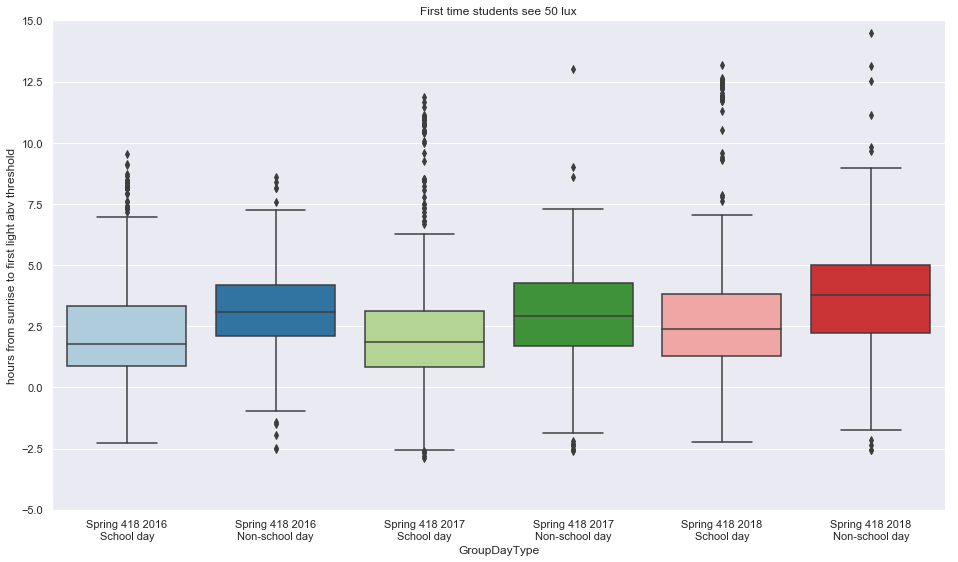

In [430]:
plt.figure(figsize=(16,9))

sns.boxplot(data=thetiming.query('Threshold == 50'),x='GroupDayType',y='hours from sunrise to first light abv threshold', order=['Spring 418 2016\nSchool day', 'Spring 418 2016\nNon-school day', 'Spring 418 2017\nSchool day', 'Spring 418 2017\nNon-school day', 'Spring 418 2018\nSchool day', 'Spring 418 2018\nNon-school day'], palette=sns.color_palette("Paired"))
plt.title('First time students see 50 lux');
plt.ylim(bottom=-5, top=15)
plt.savefig('../light figures/first50lux_sincesunset_418.png')
#plt.xticks(rotation=45);

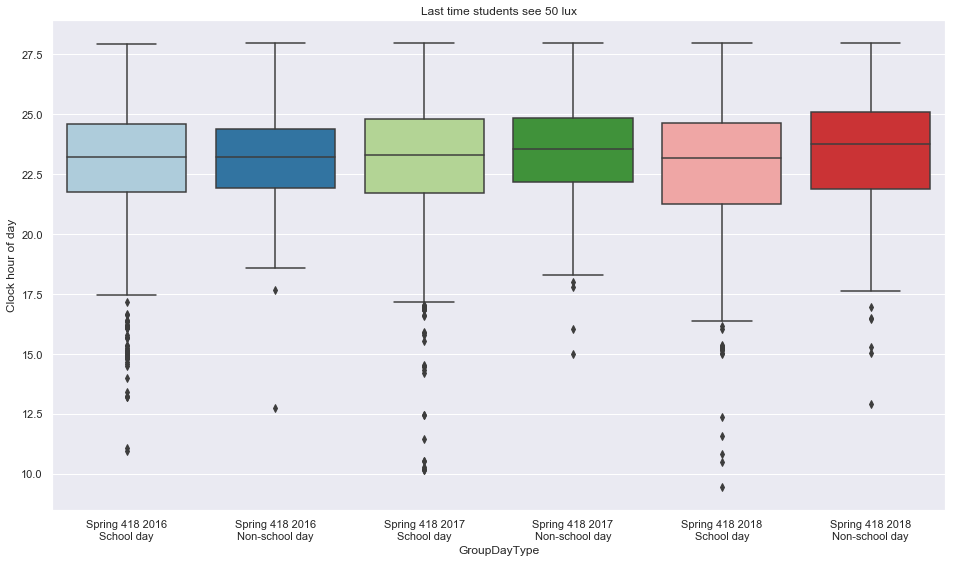

In [431]:
plt.figure(figsize=(16,9))

sns.boxplot(data=thetiming.query('Threshold == 50'),x='GroupDayType',y='lastlight', order=['Spring 418 2016\nSchool day', 'Spring 418 2016\nNon-school day', 'Spring 418 2017\nSchool day', 'Spring 418 2017\nNon-school day', 'Spring 418 2018\nSchool day', 'Spring 418 2018\nNon-school day'], palette=sns.color_palette("Paired"))
plt.title('Last time students see 50 lux');
plt.ylabel('Clock hour of day');
plt.savefig('../light figures/lastt50lux_clock_418.png')
#plt.xticks(rotation=45);

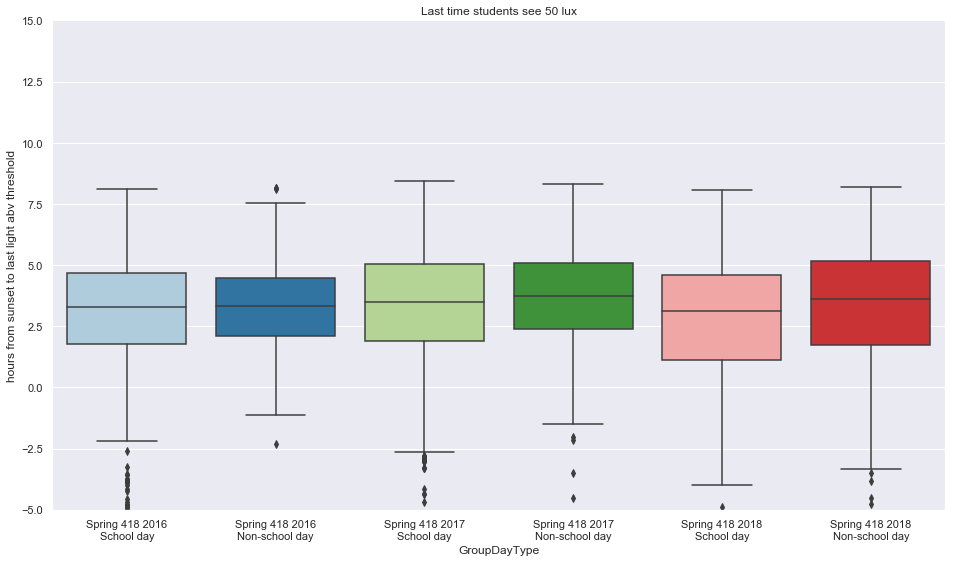

In [434]:
plt.figure(figsize=(16,9))

sns.boxplot(data=thetiming.query('Threshold == 50'),x='GroupDayType',y='hours from sunset to last light abv threshold', order=['Spring 418 2016\nSchool day', 'Spring 418 2016\nNon-school day', 'Spring 418 2017\nSchool day', 'Spring 418 2017\nNon-school day', 'Spring 418 2018\nSchool day', 'Spring 418 2018\nNon-school day'], palette=sns.color_palette("Paired"))
plt.title('Last time students see 50 lux');
plt.ylim(bottom=-5, top=15)

#plt.ylabel('Clock hour of day');
#plt.xticks(rotation=45);

plt.savefig('../light figures/lastst50lux_sincesunset_418.png')


In [4]:
sds = thetiming.groupby('GroupDayType').describe().loc[:,(slice(None),'std')]
sds = sds.droplevel(1,axis=1)
sds['firstlight']-sds['hours from sunrise to first light abv threshold']

GroupDayType
Fall 220 2015\nNon-school day     -0.009024
Fall 220 2015\nSchool day         -0.053448
Fall 220 2016\nNon-school day     -0.035298
Fall 220 2016\nSchool day          0.047387
Spring 418 2016\nNon-school day   -0.010534
Spring 418 2016\nSchool day        0.033678
Spring 418 2017\nNon-school day    0.032487
Spring 418 2017\nSchool day        0.055768
Spring 418 2018\nNon-school day   -0.006784
Spring 418 2018\nSchool day        0.046462
Summer 220 2016\nNon-school day    0.007150
Summer 220 2016\nSchool day       -0.028669
Summer 220 2017\nNon-school day   -0.002743
Summer 220 2017\nSchool day       -0.024417
Winter 220 2018\nNon-school day   -0.028094
Winter 220 2018\nSchool day       -0.043448
dtype: float64

In [436]:
sds['lastlight']-sds['hours from sunset to last light abv threshold']


GroupDayType
Fall 220 2015\nNon-school day     -0.071124
Fall 220 2015\nSchool day          0.029523
Fall 220 2016\nNon-school day     -0.078031
Fall 220 2016\nSchool day         -0.015197
Spring 418 2016\nNon-school day   -0.004178
Spring 418 2016\nSchool day       -0.028516
Spring 418 2017\nNon-school day   -0.014568
Spring 418 2017\nSchool day       -0.040406
Spring 418 2018\nNon-school day   -0.011199
Spring 418 2018\nSchool day       -0.046270
Summer 220 2016\nNon-school day   -0.004814
Summer 220 2016\nSchool day        0.017833
Summer 220 2017\nNon-school day   -0.003624
Summer 220 2017\nSchool day        0.016703
Winter 220 2018\nNon-school day   -0.034773
Winter 220 2018\nSchool day       -0.057565
dtype: float64

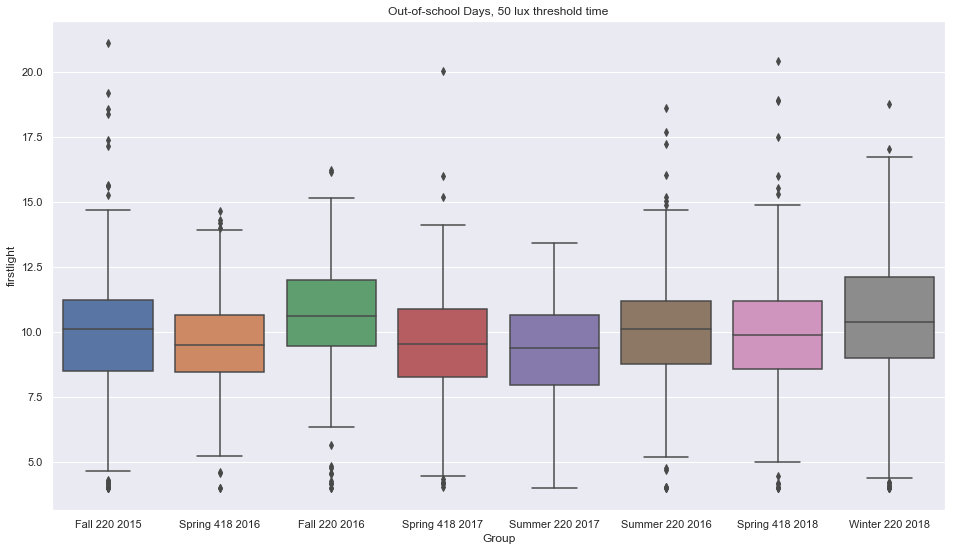

In [437]:
plt.figure(figsize=(16,9))
sns.boxplot(data=thetiming.query('Threshold == 50 and OutofSchool==True'),x='Group',y='firstlight')
plt.title('Out-of-school Days, 50 lux threshold time');

In [324]:

import matplotlib.dates as md
import matplotlib as mpl
from datetime import time

def quarter_hourly(dtime):
    tm = pd.to_datetime('{}:{:02d}'.format(dtime.hour,(dtime.minute//15)*15))
    return tm.time()

def five_minutely(dtime):
    tm = pd.to_datetime('{}:{:02d}'.format(dtime.hour,(dtime.minute//5)*5))
    return tm.time()

def plot_light(dlist, llist, toplot='mean/sem', ylim=1000, ylabel='Lux ', palette=sns.color_palette('deep') ):
    
    assert ( len(dlist) == len(llist) )
    dm=[]
    dlo=[]
    dhi=[]
    tinc = 200
    
    if toplot=='mean/sem':  
        for d in dlist:
            dm.append( d.mean().sort_index() )
            tmp = d.sem().sort_index()
            dlo.append( dm[-1] - tmp )
            dhi.append( dm[-1] + tmp )
    elif toplot=='counts':
        tinc = 5000
        toplot = ''
        ylabel = 'Number of samples '
        ylim = np.max( [d1m.max(), d2m.max()] ) * 1.05
        for d in dlist:
            dm.append( d.count().sort_index() )
            dlo.append( dm[-1] )
            dhi.append( dm[-1] )
    elif toplot=='quantiles':
        for d in dlist:
            dm.append( d.median().sort_index() )
            dlo.append( d.quantile(0.25).sort_index() )
            dhi.append( d.quantile(0.75).sort_index() )
    else:
        print('what do you want to plot?')
        exit(1)
    
    plt.figure(figsize=(8,6))
    ax=plt.gca()
    
    pidx = 0
    
    
    for mid, lo, hi, lab in zip(dm,dlo,dhi,llist):
        cval = mpl.colors.to_hex( palette[pidx] )
        pidx = pidx + 1
        timval = [ pd.Timestamp(av.isoformat()) for av in mid.index.tolist() ]
               
        vals = pd.DataFrame( mid )
        vals['time']=vals.index.to_series()
        vals['mins']=vals.time.apply(lambda x: x.second/60.0 + x.minute + x.hour*60.0)
        vals['lux-mins']=vals['White Light']*vals['mins']
        v = vals['lux-mins'].mean()/vals['White Light'].mean()
        hrs = int(v/1440*24)
        mins = int( (v - hrs*60) )
        tmid = time( hrs, mins)
        #per = mid.index.diff().min()
        # assumes watch sample period is 15 sec (4/min) and the groupby is 5 min... lets automate this soon
        print '{} - cumulative {}*sec: {:e}, center of mass of light exposure: {}'.format(lab,ylabel.strip(),mid.sum()*20,tmid)
        lab = lab+'\n{:4.3e} lx*s, COLE {}'.format(mid.sum()*20,tmid)
        
        ax.plot(timval, mid.values, color=cval, label=lab)
        ax.fill_between(timval, hi.values, lo.values, color=cval, alpha=0.33)
        
    ax.legend()

    # format the ticks
    tFmt = md.DateFormatter('%H:%M')
    ax.xaxis.set_major_locator(md.HourLocator(byhour=range(0,24,4)))
    ax.xaxis.set_major_formatter(tFmt)
    ax.set_ylim(0,ylim)
    ax.yaxis.set_ticks(np.arange(tinc,ylim,tinc))
    #ax.xaxis.set_minor_locator(minx15)

    #ax.format_xdata = mdates.DateFormatter('%H:%M')

    ax.grid(True)
    plt.ylabel(ylabel + toplot)
    plt.xlabel('Time of day')
    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    #fig.autofmt_xdate()



    


In [146]:
allData.columns

Index([u'Off-Wrist Status', u'Activity', u'Marker', u'White Light',
       u'Red Light', u'Green Light', u'Blue Light', u'Sleep/Wake',
       u'Interval Status', u'UID', u'Group', u'Quarter', u'Class', u'Year',
       u'Subject ID', u'is_weekend'],
      dtype='object')

In [94]:
these_rows = np.logical_and( np.logical_not(allData['Off-Wrist Status']), np.logical_and( allData['Interval Status'].isin(['ACTIVE','REST']), allData['White Light']>1.0) ) 
for agroup in allData.Group.unique():
    print agroup
    theones = (allData.Group == agroup) & (these_rows)
    exec('{} = allData[theones].dropna().groupby(quarter_hourly).filter(lambda x: x["White Light"].count()>500,dropna=False).groupby(quarter_hourly)'.format(agroup.replace(' ','_'),  ))


Fall 220 2015
Spring 418 2016
Fall 220 2016
Spring 418 2017
Summer 220 2017
Summer 220 2016
Spring 418 2018
Winter 220 2018


Fall 220 2015 - cumulative Lux*sec: 4.711744e+05, center of mass of light exposure: 12:48:00
Fall 220 2016 - cumulative Lux*sec: 4.341951e+05, center of mass of light exposure: 13:35:00
Summer 220 2016 - cumulative Lux*sec: 5.494794e+05, center of mass of light exposure: 12:44:00
Summer 220 2017 - cumulative Lux*sec: 6.455632e+05, center of mass of light exposure: 12:47:00
Winter 220 2018 - cumulative Lux*sec: 4.549549e+05, center of mass of light exposure: 12:57:00


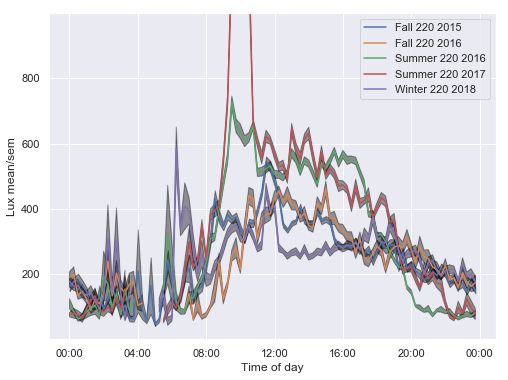

In [122]:
sns.set(style="darkgrid")
vals = [ Fall_220_2015['White Light'], Fall_220_2016['White Light'], Summer_220_2016['White Light'], Summer_220_2017['White Light'], Winter_220_2018['White Light'] ]
labels = [ 'Fall 220 2015', 'Fall 220 2016', 'Summer 220 2016', 'Summer 220 2017', 'Winter 220 2018']
plot_light(vals,labels)

Summer 220 2016 - cumulative Lux*sec: 5.494794e+05, center of mass of light exposure: 12:44:00
Summer 220 2017 - cumulative Lux*sec: 6.455632e+05, center of mass of light exposure: 12:47:00
Winter 220 2018 - cumulative Lux*sec: 4.549549e+05, center of mass of light exposure: 12:57:00


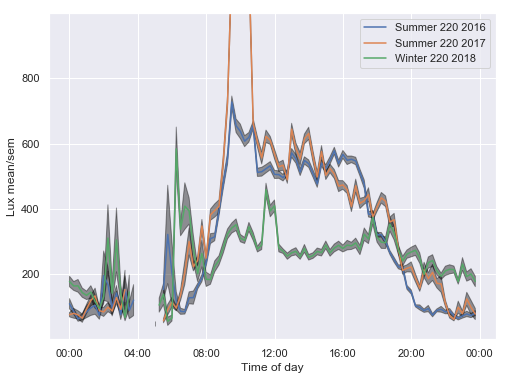

In [128]:
sns.set(style="darkgrid")
vals = [  Summer_220_2016['White Light'], Summer_220_2017['White Light'], Winter_220_2018['White Light'] ]
labels = [  'Summer 220 2016', 'Summer 220 2017', 'Winter 220 2018']
plot_light(vals,labels)

Fall 220 2015 - cumulative Lux*sec: 4.711744e+05, center of mass of light exposure: 12:48:00
Fall 220 2016 - cumulative Lux*sec: 4.341951e+05, center of mass of light exposure: 13:35:00


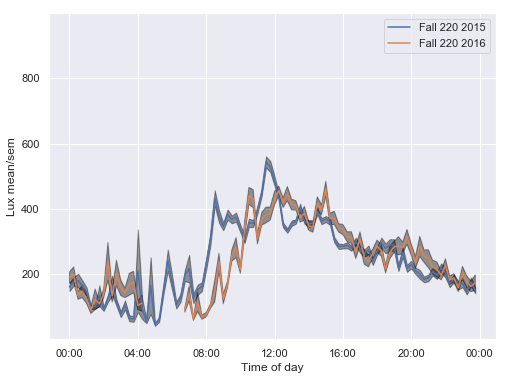

In [125]:
sns.set(style="darkgrid")
vals = [ Fall_220_2015['White Light'], Fall_220_2016['White Light'] ]
labels = [ 'Fall 220 2015', 'Fall 220 2016',]
plot_light(vals,labels)

Fall 220 2015 - cumulative Lux*sec: 4.800180e+04, center of mass of light exposure: 12:33:00
Fall 220 2016 - cumulative Lux*sec: 3.856580e+04, center of mass of light exposure: 13:17:00


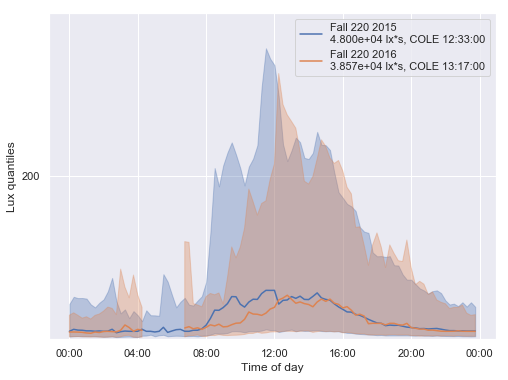

In [325]:
sns.set(style="darkgrid")
vals = [ Fall_220_2015['White Light'], Fall_220_2016['White Light'] ]
labels = [ 'Fall 220 2015', 'Fall 220 2016',]
plot_light(vals,labels, toplot='quantiles', ylim=400)

Spring 418 2016 - cumulative Lux*sec: 5.387902e+05, center of mass of light exposure: 13:31:00
Spring 418 2017 - cumulative Lux*sec: 4.927554e+05, center of mass of light exposure: 13:00:00
Spring 418 2018 - cumulative Lux*sec: 4.431190e+05, center of mass of light exposure: 13:24:00


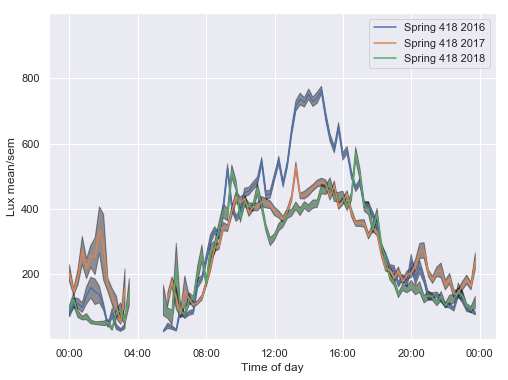

In [124]:
sns.set(style="darkgrid")
vals = [ Spring_418_2016['White Light'], Spring_418_2017['White Light'], Spring_418_2018['White Light'] ]
labels = [ 'Spring 418 2016', 'Spring 418 2017', 'Spring 418 2018']
plot_light(vals,labels)

Spring 418 2016 - cumulative Lux*sec: 5.387902e+05, center of mass of light exposure: 13:31:00
Spring 418 2017 - cumulative Lux*sec: 4.927554e+05, center of mass of light exposure: 13:00:00
Spring 418 2018 - cumulative Lux*sec: 4.431190e+05, center of mass of light exposure: 13:24:00


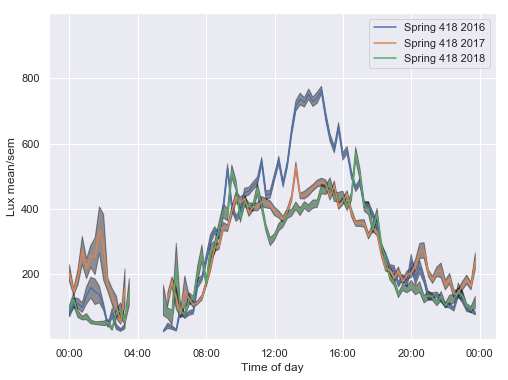

In [124]:
sns.set(style="darkgrid")
vals = [ Spring_418_2016['White Light'], Spring_418_2017['White Light'], Spring_418_2018['White Light'] ]
labels = [ 'Spring 418 2016', 'Spring 418 2017', 'Spring 418 2018']
plot_light(vals,labels)

In [278]:
these_rows = np.logical_and( np.logical_not(allData['Off-Wrist Status']), np.logical_and( allData['Interval Status'].isin(['ACTIVE','REST']), allData['White Light']>1.0) ) 
for agroup in allData.GroupDayType.unique():
    print agroup
    theones = (allData.GroupDayType == agroup) & (these_rows)
    exec('{} = allData[theones].dropna(subset=["White Light"]).groupby(quarter_hourly).filter(lambda x: x["White Light"].count()>500,dropna=False).groupby(quarter_hourly)'.format(agroup.replace(' ','_').replace('-','')) )


Fall 220 2015 School day
Fall 220 2015 Non-school day
Spring 418 2016 School day
Spring 418 2016 Non-school day
Fall 220 2016 School day
Fall 220 2016 Non-school day
Spring 418 2017 School day
Spring 418 2017 Non-school day
Summer 220 2017 School day
Summer 220 2017 Non-school day
Summer 220 2016 School day
Summer 220 2016 Non-school day
Spring 418 2018 School day
Spring 418 2018 Non-school day
Winter 220 2018 School day
Winter 220 2018 Non-school day


Spring 418 2016 School day - cumulative Lux*sec: 5.622042e+05, center of mass of light exposure: 13:31:00
Spring 418 2016 Non-school day - cumulative Lux*sec: 4.718400e+05, center of mass of light exposure: 13:44:00


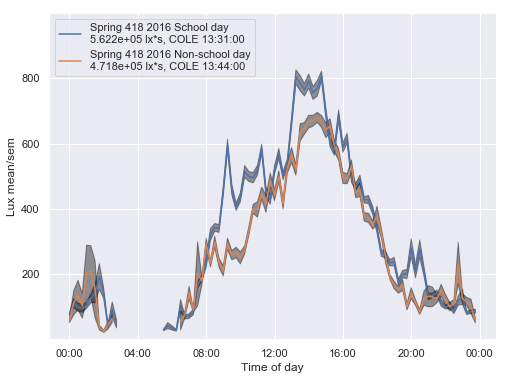

In [305]:
sns.set(style="darkgrid")
vals = [ Spring_418_2016_School_day['White Light'], Spring_418_2016_Nonschool_day['White Light'] ]
labels = [ 'Spring 418 2016 School day', 'Spring 418 2016 Non-school day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_418_spring__2016.png')

Spring 418 2017 School day - cumulative Lux*sec: 4.997796e+05, center of mass of light exposure: 13:08:00
Spring 418 2017 Non-school day - cumulative Lux*sec: 4.263175e+05, center of mass of light exposure: 13:40:00


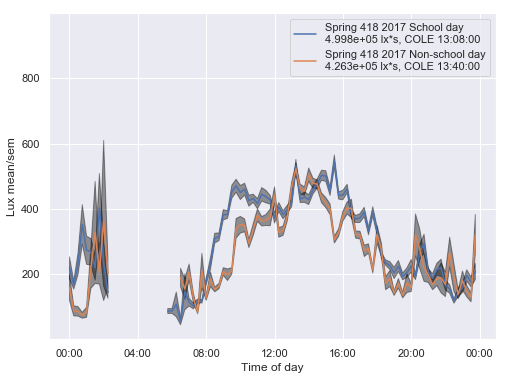

In [306]:
sns.set(style="darkgrid")
vals = [ Spring_418_2017_School_day['White Light'], Spring_418_2017_Nonschool_day['White Light'] ]
labels = [ 'Spring 418 2017 School day', 'Spring 418 2017 Non-school day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_418_spring__2017.png')

Spring 418 2018 School day - cumulative Lux*sec: 4.802649e+05, center of mass of light exposure: 13:33:00
Spring 418 2018 Non-school day - cumulative Lux*sec: 3.006701e+05, center of mass of light exposure: 13:57:00


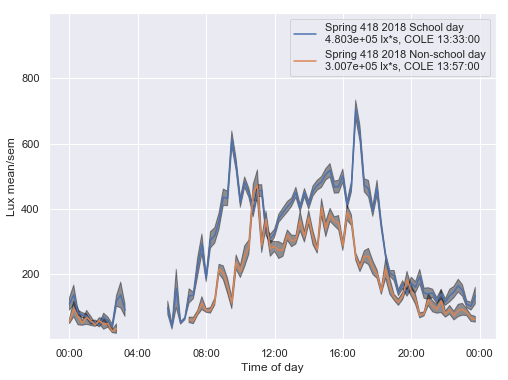

In [307]:
sns.set(style="darkgrid")
vals = [ Spring_418_2018_School_day['White Light'], Spring_418_2018_Nonschool_day['White Light'] ]
labels = [ 'Spring 418 2018 School day', 'Spring 418 2018 Non-school day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_418_spring_2018.png')

Fall 220 2015 School day - cumulative Lux*sec: 5.187350e+05, center of mass of light exposure: 13:04:00
Fall 220 2015 Non-school day - cumulative Lux*sec: 3.018416e+05, center of mass of light exposure: 12:45:00


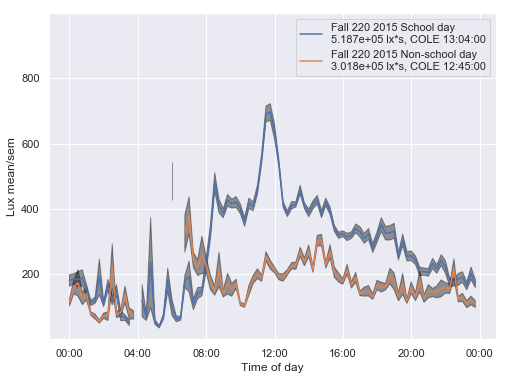

In [308]:
sns.set(style="darkgrid")
vals = [ Fall_220_2015_School_day['White Light'], Fall_220_2015_Nonschool_day['White Light'] ]
labels = [ 'Fall 220 2015 School day', 'Fall 220 2015 Non-school day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_220_fall_2015.png')

Fall 220 2016 School day - cumulative Lux*sec: 4.828292e+05, center of mass of light exposure: 13:43:00
Fall 220 2016 Non-school day - cumulative Lux*sec: 2.573633e+05, center of mass of light exposure: 14:12:00


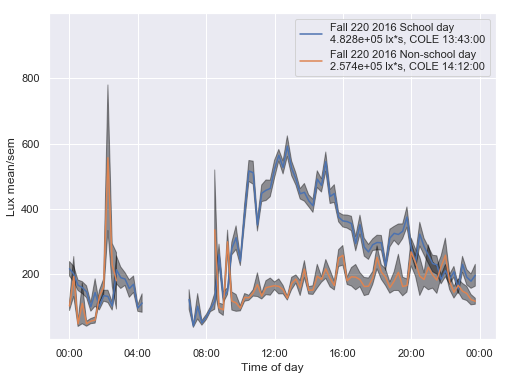

In [309]:
sns.set(style="darkgrid")
vals = [ Fall_220_2016_School_day['White Light'], Fall_220_2016_Nonschool_day['White Light'] ]
labels = [ 'Fall 220 2016 School day', 'Fall 220 2016 Non-school day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_220_fall_2016.png')

Summer 220 2017 School day - cumulative Lux*sec: 6.833113e+05, center of mass of light exposure: 12:55:00
Summer 220 2017 Non-school day - cumulative Lux*sec: 5.066484e+05, center of mass of light exposure: 13:21:00


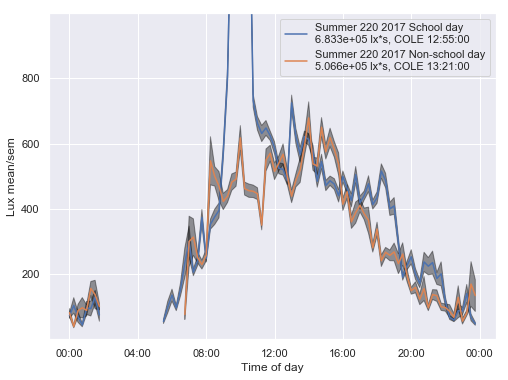

In [310]:
sns.set(style="darkgrid")
vals = [ Summer_220_2017_School_day['White Light'], Summer_220_2017_Nonschool_day['White Light'] ]
labels = [ 'Summer 220 2017 School day', 'Summer 220 2017 Non-school day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_220_summer_2017.png')

Summer 220 2016 School day - cumulative Lux*sec: 5.494819e+05, center of mass of light exposure: 12:52:00
Summer 220 2016 Non-school day - cumulative Lux*sec: 4.929151e+05, center of mass of light exposure: 13:13:00


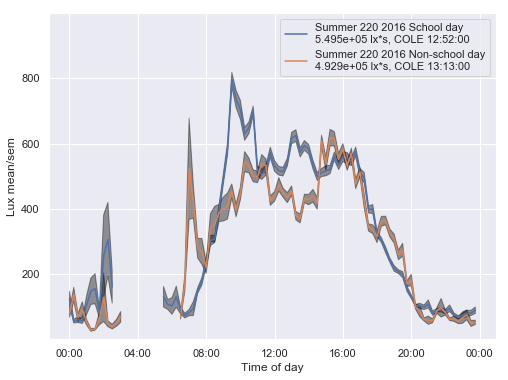

In [311]:
sns.set(style="darkgrid")
vals = [ Summer_220_2016_School_day['White Light'], Summer_220_2016_Nonschool_day['White Light'] ]
labels = [ 'Summer 220 2016 School day', 'Summer 220 2016 Non-school day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_220_summer_2016.png')

Winter 220 2018 School day - cumulative Lux*sec: 4.956792e+05, center of mass of light exposure: 13:17:00
Winter 220 2018 Non-school day - cumulative Lux*sec: 2.807696e+05, center of mass of light exposure: 13:10:00


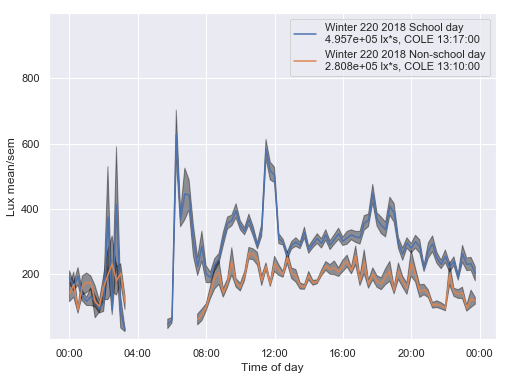

In [312]:
sns.set(style="darkgrid")
vals = [ Winter_220_2018_School_day['White Light'], Winter_220_2018_Nonschool_day['White Light'] ]
labels = [ 'Winter 220 2018 School day', 'Winter 220 2018 Non-school day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_220_winter_2018.png')

Spring 418 2016 School day - cumulative Lux*sec: 8.173670e+04, center of mass of light exposure: 13:15:00
Spring 418 2016 Non-school day - cumulative Lux*sec: 3.859570e+04, center of mass of light exposure: 13:53:00


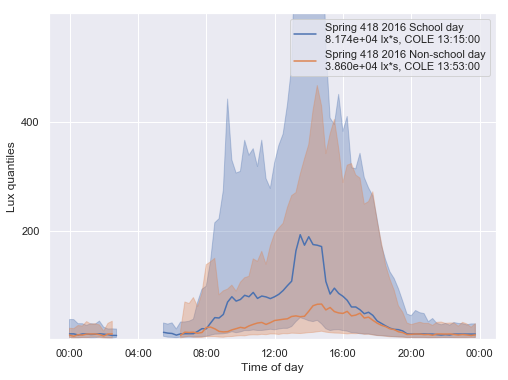

In [331]:
sns.set(style="darkgrid")
vals = [ Spring_418_2016_School_day['White Light'], Spring_418_2016_Nonschool_day['White Light'] ]
labels = [ 'Spring 418 2016 School day', 'Spring 418 2016 Non-school day']
plot_light(vals,labels,toplot='quantiles', ylim=600)
plt.savefig('../light figures/daytype_qlux_418_spring__2016.png')

Spring 418 2017 School day - cumulative Lux*sec: 7.045390e+04, center of mass of light exposure: 13:22:00
Spring 418 2017 Non-school day - cumulative Lux*sec: 3.941550e+04, center of mass of light exposure: 13:27:00


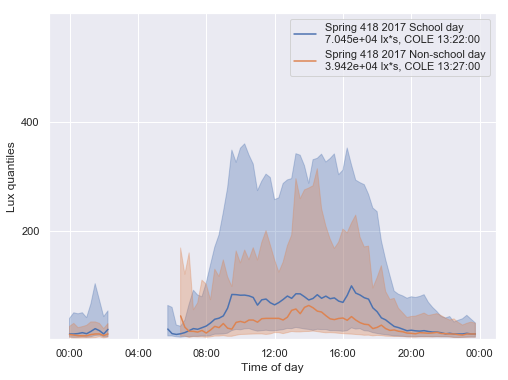

In [332]:
sns.set(style="darkgrid")
vals = [ Spring_418_2017_School_day['White Light'], Spring_418_2017_Nonschool_day['White Light'] ]
labels = [ 'Spring 418 2017 School day', 'Spring 418 2017 Non-school day']
plot_light(vals,labels,toplot='quantiles', ylim=600)
plt.savefig('../light figures/daytype_qlux_418_spring__2017.png')

Spring 418 2018 School day - cumulative Lux*sec: 5.958770e+04, center of mass of light exposure: 13:17:00
Spring 418 2018 Non-school day - cumulative Lux*sec: 2.566770e+04, center of mass of light exposure: 13:39:00


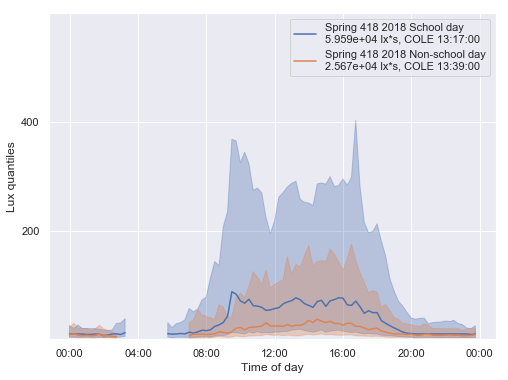

In [333]:
sns.set(style="darkgrid")
vals = [ Spring_418_2018_School_day['White Light'], Spring_418_2018_Nonschool_day['White Light'] ]
labels = [ 'Spring 418 2018 School day', 'Spring 418 2018 Non-school day']
plot_light(vals,labels,toplot='quantiles', ylim=600)
plt.savefig('../light figures/daytype_qlux_418_spring_2018.png')

Fall 220 2015 School day - cumulative Lux*sec: 6.334210e+04, center of mass of light exposure: 12:38:00
Fall 220 2015 Non-school day - cumulative Lux*sec: 3.137160e+04, center of mass of light exposure: 11:37:00


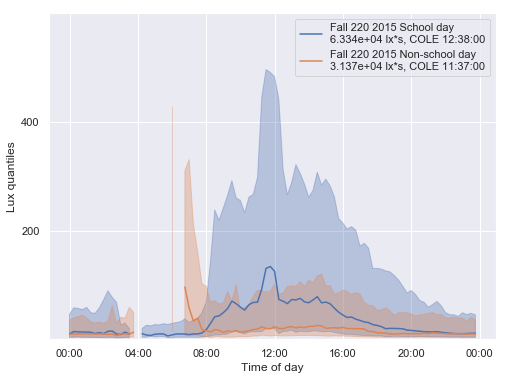

In [334]:
sns.set(style="darkgrid")
vals = [ Fall_220_2015_School_day['White Light'], Fall_220_2015_Nonschool_day['White Light'] ]
labels = [ 'Fall 220 2015 School day', 'Fall 220 2015 Non-school day']
plot_light(vals,labels,toplot='quantiles', ylim=600)
plt.savefig('../light figures/daytype_qlux_220_fall_2015.png')

Fall 220 2016 School day - cumulative Lux*sec: 5.080600e+04, center of mass of light exposure: 13:16:00
Fall 220 2016 Non-school day - cumulative Lux*sec: 1.803620e+04, center of mass of light exposure: 14:13:00


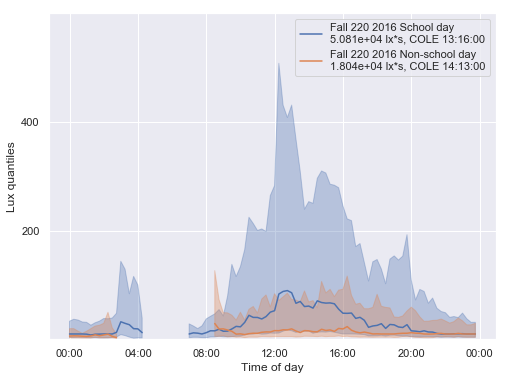

In [335]:
sns.set(style="darkgrid")
vals = [ Fall_220_2016_School_day['White Light'], Fall_220_2016_Nonschool_day['White Light'] ]
labels = [ 'Fall 220 2016 School day', 'Fall 220 2016 Non-school day']
plot_light(vals,labels,toplot='quantiles', ylim=600)
plt.savefig('../light figures/daytype_qlux_220_fall_2016.png')

Summer 220 2017 School day - cumulative Lux*sec: 1.185919e+05, center of mass of light exposure: 12:07:00
Summer 220 2017 Non-school day - cumulative Lux*sec: 4.784500e+04, center of mass of light exposure: 13:19:00


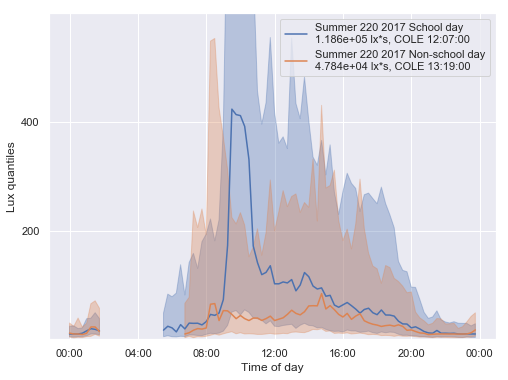

In [336]:
sns.set(style="darkgrid")
vals = [ Summer_220_2017_School_day['White Light'], Summer_220_2017_Nonschool_day['White Light'] ]
labels = [ 'Summer 220 2017 School day', 'Summer 220 2017 Non-school day']
plot_light(vals,labels,toplot='quantiles', ylim=600)
plt.savefig('../light figures/daytype_qlux_220_summer_2017.png')

Summer 220 2016 School day - cumulative Lux*sec: 8.826770e+04, center of mass of light exposure: 12:39:00
Summer 220 2016 Non-school day - cumulative Lux*sec: 3.522370e+04, center of mass of light exposure: 13:50:00


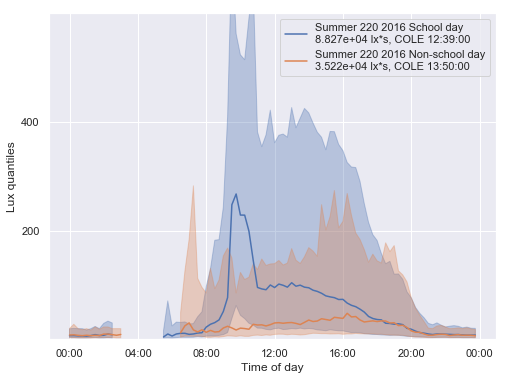

In [337]:
sns.set(style="darkgrid")
vals = [ Summer_220_2016_School_day['White Light'], Summer_220_2016_Nonschool_day['White Light'] ]
labels = [ 'Summer 220 2016 School day', 'Summer 220 2016 Non-school day']
plot_light(vals,labels,toplot='quantiles', ylim=600)
plt.savefig('../light figures/daytype_qlux_220_summer_2016.png')

Winter 220 2018 School day - cumulative Lux*sec: 4.682520e+04, center of mass of light exposure: 12:58:00
Winter 220 2018 Non-school day - cumulative Lux*sec: 2.283150e+04, center of mass of light exposure: 13:30:00


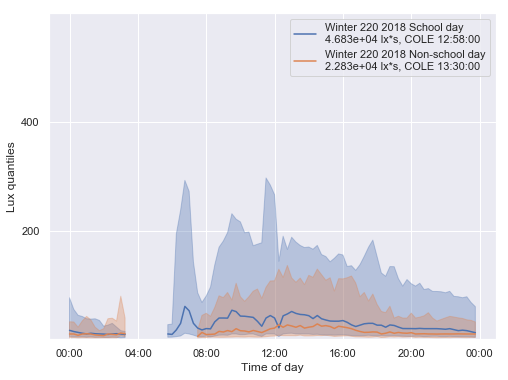

In [338]:
sns.set(style="darkgrid")
vals = [ Winter_220_2018_School_day['White Light'], Winter_220_2018_Nonschool_day['White Light'] ]
labels = [ 'Winter 220 2018 School day', 'Winter 220 2018 Non-school day']
plot_light(vals,labels,toplot='quantiles', ylim=600)
plt.savefig('../light figures/daytype_qlux_220_winter_2018.png')

In [328]:
dpart = allData['OutofSchool'].apply(lambda x: 'Non-school day' if x else 'School day')
allData['QuarterDayType'] = allData['Quarter'].str.cat( dpart, sep=' ')

In [329]:
allData.QuarterDayType.unique()

array(['Fall School day', 'Fall Non-school day', 'Spring School day',
       'Spring Non-school day', 'Summer School day',
       'Summer Non-school day', 'Winter School day',
       'Winter Non-school day'], dtype=object)

In [330]:
these_rows = np.logical_and( np.logical_not(allData['Off-Wrist Status']), np.logical_and( allData['Interval Status'].isin(['ACTIVE','REST']), allData['White Light']>1.0) ) 
for agroup in allData.QuarterDayType.unique():
    print agroup
    theones = (allData.QuarterDayType == agroup) & (these_rows)
    exec('{} = allData[theones].dropna(subset=["White Light"]).groupby(quarter_hourly).filter(lambda x: x["White Light"].count()>500,dropna=False).groupby(quarter_hourly)'.format(agroup.replace(' ','_').replace('-','')) )


Fall School day
Fall Non-school day
Spring School day
Spring Non-school day
Summer School day
Summer Non-school day
Winter School day
Winter Non-school day


Winter Nonschool day - cumulative Lux*sec: 2.807696e+05, center of mass of light exposure: 13:10:00
Spring Nonschool day - cumulative Lux*sec: 4.328849e+05, center of mass of light exposure: 13:10:00
Summer Nonschool day - cumulative Lux*sec: 5.103392e+05, center of mass of light exposure: 13:00:00
Fall Nonschool day - cumulative Lux*sec: 3.248957e+05, center of mass of light exposure: 12:19:00


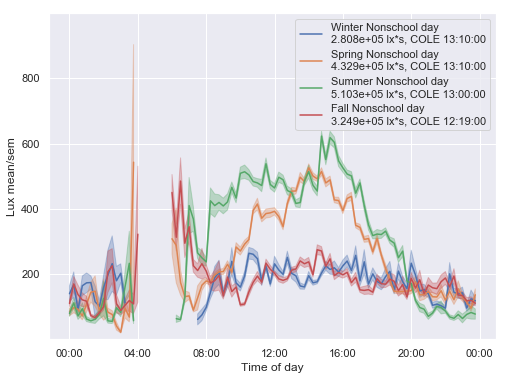

In [339]:
sns.set(style="darkgrid")
vals = [ Winter_Nonschool_day['White Light'], Spring_Nonschool_day['White Light'], Summer_Nonschool_day['White Light'], Fall_Nonschool_day['White Light'] ]
labels = [ 'Winter Nonschool day', 'Spring Nonschool day', 'Summer Nonschool day', 'Fall Nonschool day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_season_nonschool_day.png')

Winter School day - cumulative Lux*sec: 4.956792e+05, center of mass of light exposure: 13:17:00
Spring School day - cumulative Lux*sec: 5.330128e+05, center of mass of light exposure: 13:05:00
Summer School day - cumulative Lux*sec: 6.077615e+05, center of mass of light exposure: 12:38:00
Fall School day - cumulative Lux*sec: 5.214372e+05, center of mass of light exposure: 13:03:00


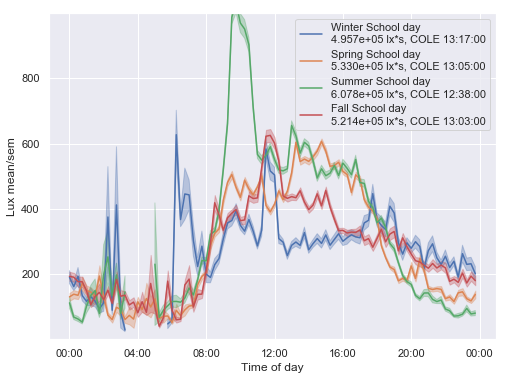

In [340]:
sns.set(style="darkgrid")
vals = [ Winter_School_day['White Light'], Spring_School_day['White Light'], Summer_School_day['White Light'], Fall_School_day['White Light'] ]
labels = [ 'Winter School day', 'Spring School day', 'Summer School day', 'Fall School day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_season_school_day.png')

Winter School day - cumulative Lux*sec: 4.956792e+05, center of mass of light exposure: 13:17:00
Winter Nonschool day - cumulative Lux*sec: 2.807696e+05, center of mass of light exposure: 13:10:00


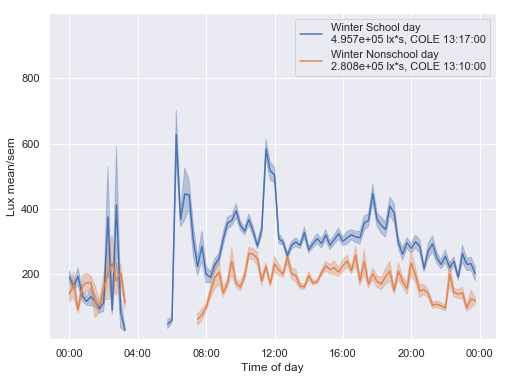

In [341]:
sns.set(style="darkgrid")
vals = [ Winter_School_day['White Light'], Winter_Nonschool_day['White Light']]
labels = [ 'Winter School day', 'Winter Nonschool day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_winter.png')

Spring School day - cumulative Lux*sec: 5.330128e+05, center of mass of light exposure: 13:05:00
Spring Nonschool day - cumulative Lux*sec: 4.328849e+05, center of mass of light exposure: 13:10:00


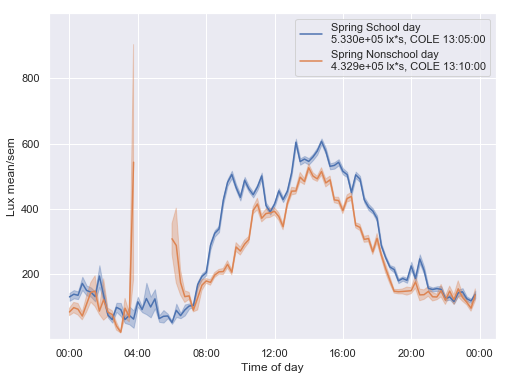

In [342]:
sns.set(style="darkgrid")
vals = [ Spring_School_day['White Light'], Spring_Nonschool_day['White Light']]
labels = [ 'Spring School day', 'Spring Nonschool day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_spring.png')

Summer School day - cumulative Lux*sec: 6.077615e+05, center of mass of light exposure: 12:38:00
Summer Nonschool day - cumulative Lux*sec: 5.103392e+05, center of mass of light exposure: 13:00:00


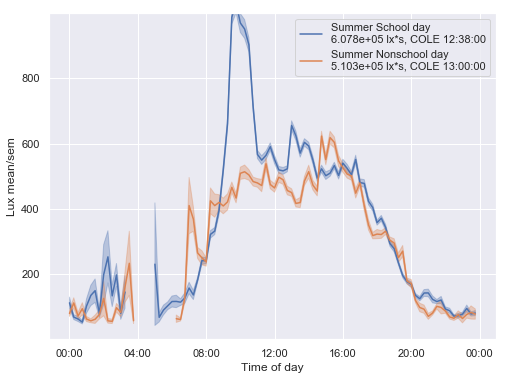

In [343]:
sns.set(style="darkgrid")
vals = [ Summer_School_day['White Light'], Summer_Nonschool_day['White Light']]
labels = [ 'Summer School day', 'Summer Nonschool day']
plot_light(vals,labels)
plt.savefig('../light figures/daytype_avelux_summer.png')